E:\anaconda\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   close  future  target
0  51.02   51.51       1
1  51.23   51.88       1
2  50.13   51.56       1
3  51.51   52.55       1
4  51.88   51.27       0
5  51.56   50.63       0
6  52.55   48.83       0
7  51.27   50.39       0
8  50.63   52.22       1
9  48.83   51.74       1


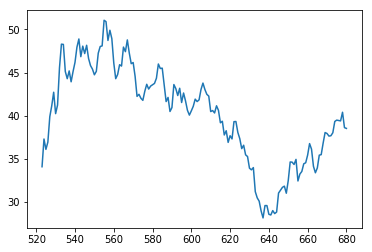

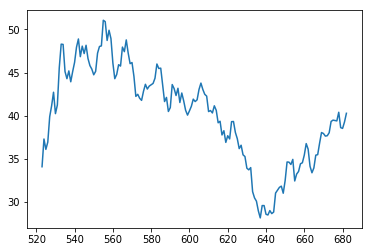

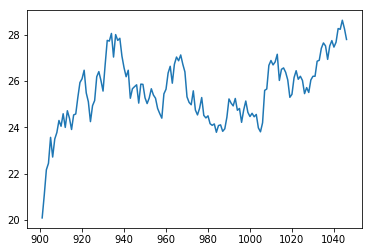

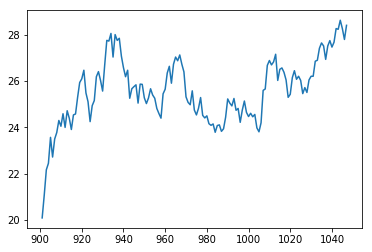

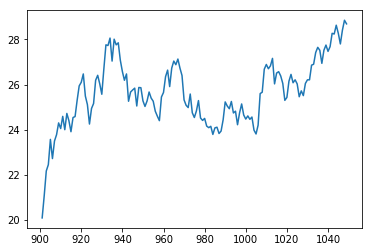

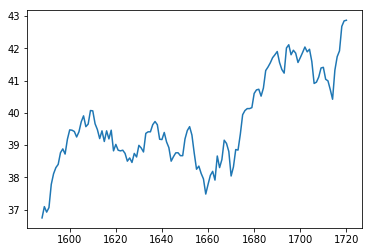

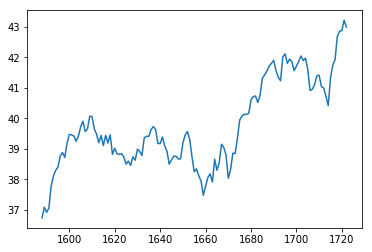

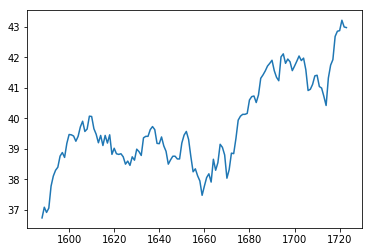

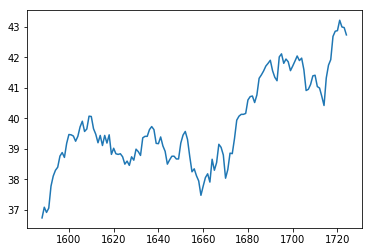

[1721, 1743, 1752, 1760, 1774]
[43.21 40.49 41.72 40.5  41.9 ]


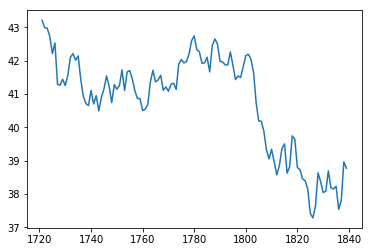

[1721, 1743, 1752, 1760, 1775]
[43.21 40.49 41.72 40.5  42.03]


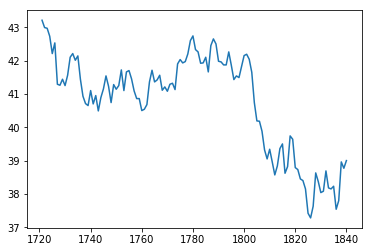

[1721, 1743, 1752, 1760, 1778]
[43.21 40.49 41.72 40.5  42.2 ]


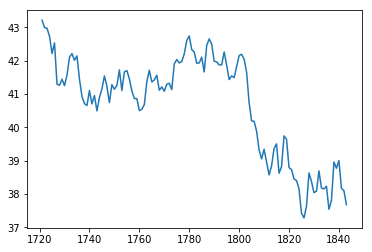

[1721, 1743, 1752, 1760, 1779]
[43.21 40.49 41.72 40.5  42.6 ]


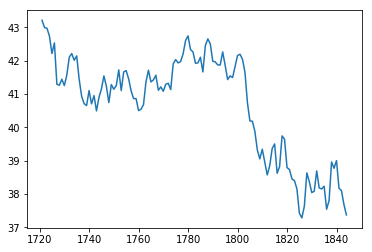

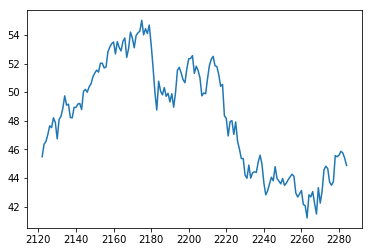

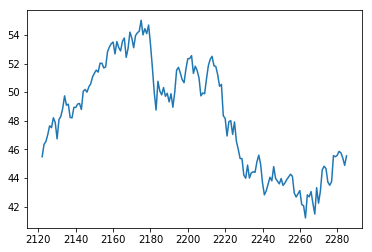

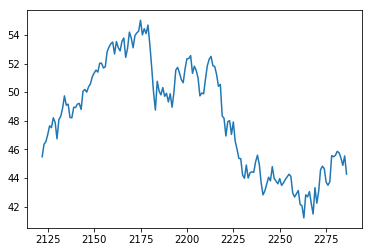

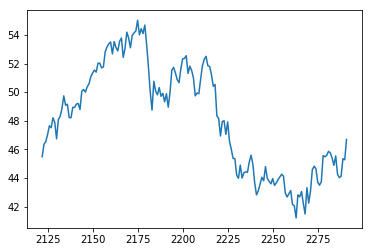

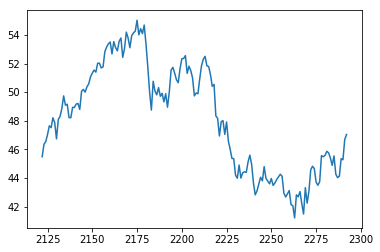

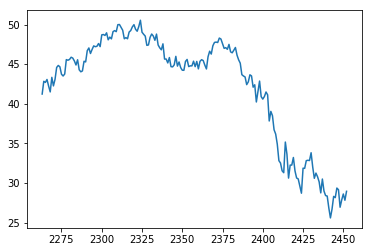

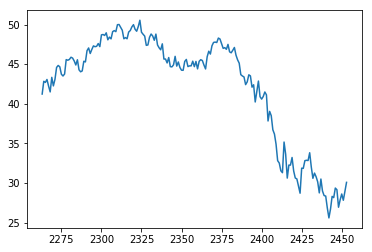

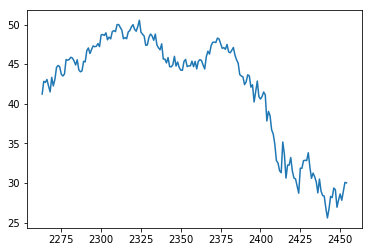

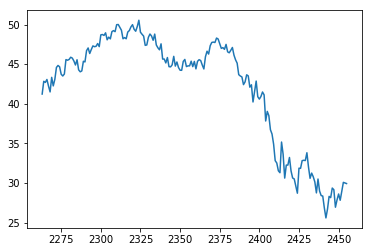

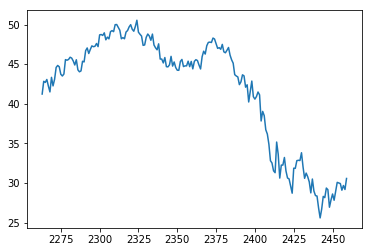

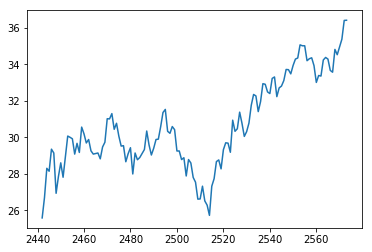

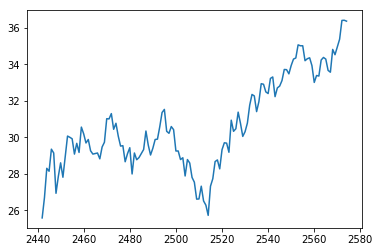

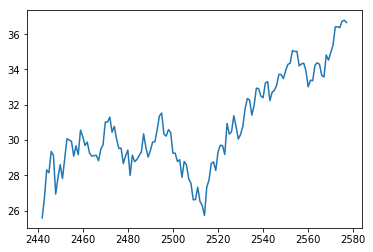

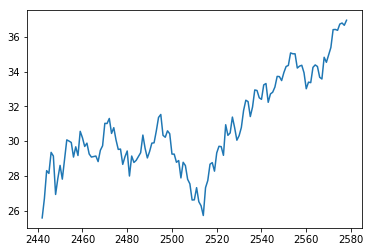

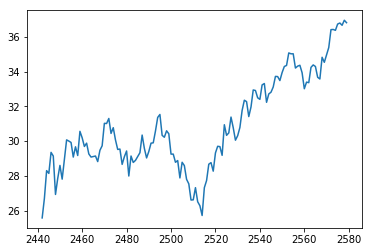

[3115, 3133, 3153, 3163, 3171]
[59.62 50.05 56.63 51.12 57.1 ]


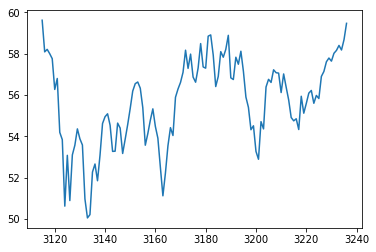

[3115, 3133, 3153, 3163, 3172]
[59.62 50.05 56.63 51.12 58.17]


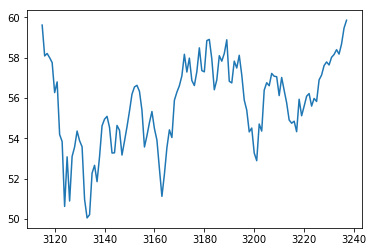

[3115, 3133, 3153, 3163, 3178]
[59.62 50.05 56.63 51.12 58.49]


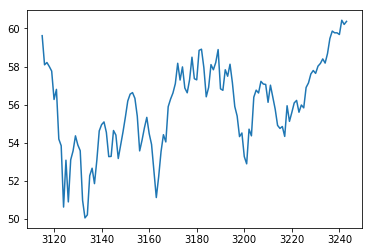

[3115, 3133, 3153, 3163, 3181]
[59.62 50.05 56.63 51.12 58.85]


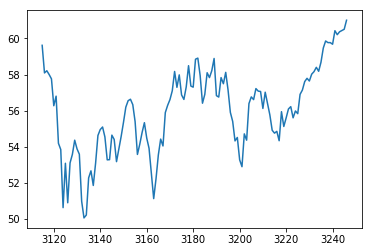

[3115, 3133, 3153, 3163, 3182]
[59.62 50.05 56.63 51.12 58.91]


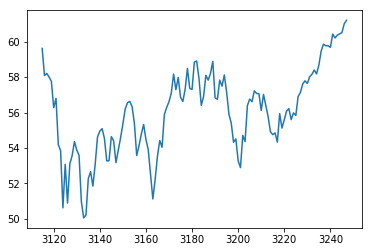

[4116, 4142, 4158, 4166, 4178]
[113.98  98.08 107.11  99.48 107.66]


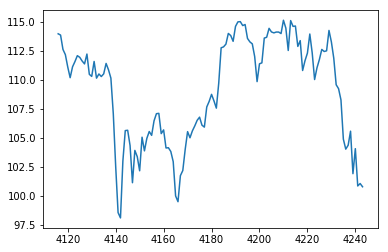

[4116, 4142, 4158, 4166, 4179]
[113.98  98.08 107.11  99.48 108.14]


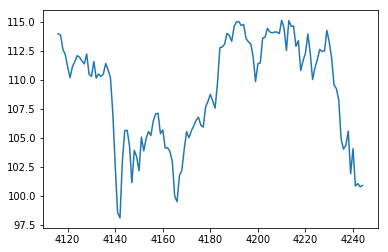

[4116, 4142, 4158, 4166, 4180]
[113.98  98.08 107.11  99.48 108.75]


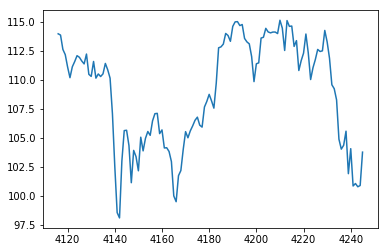

[4116, 4142, 4158, 4166, 4183]
[113.98  98.08 107.11  99.48 109.72]


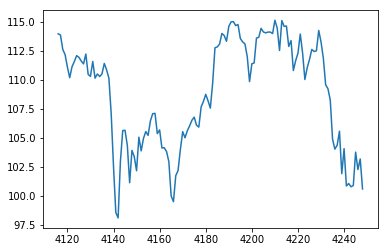

[4116, 4142, 4158, 4166, 4184]
[113.98  98.08 107.11  99.48 112.77]


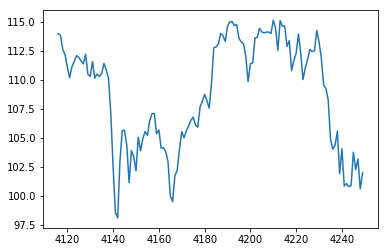

[4116, 4142, 4158, 4166, 4185]
[113.98  98.08 107.11  99.48 112.85]


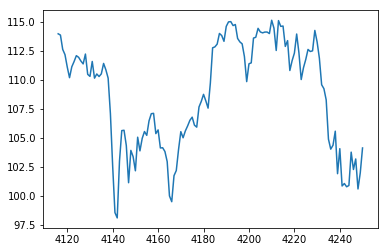

[4116, 4142, 4158, 4166, 4186]
[113.98  98.08 107.11  99.48 113.09]


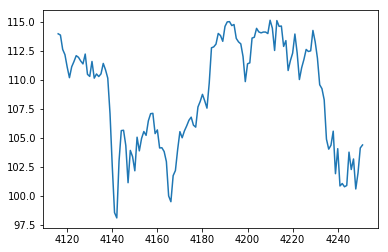

In [33]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema

etf = 'QQQ'
err_allowed = 20.0/100
df = pd.read_table("E:/Stock Data/QQQ.txt", delimiter=',', 
                   names=['date', 'low', 'high', 'open', 'close', 'volume'])
df['21ma'] = df['close'].rolling(window=21, min_periods=0).mean()


data = df
data = data.drop_duplicates(keep=False)

data.set_index("date", inplace=True)  # set time as index 
data = df[['close', 'volume', '21ma']]  # ignore the other columns besides price and volume

price = data.close.iloc[:len(data)]
pattern_count = 0
x = []
y = []

def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0

data['future'] = data['close'].shift(-3)
data['target'] = list(map(classify, data['close'], data['future']))

print(data[['close', 'future', 'target']].head(10))
    
for i in range(100, len(price)):
    
    max_idx = list(argrelextrema(price.values[:i], np.greater, order=15)[0])
    min_idx = list(argrelextrema(price.values[:i], np.less, order=15)[0])
    idx = max_idx + min_idx + [len(price.values[:i]) - 1]
    idx.sort()

    current_idx = idx[-5:]

    start = min(current_idx)
    end = max(current_idx)

    current_pat = price.values[current_idx]

    xa = current_pat[1] - current_pat[0]
    ab = current_pat[2] - current_pat[1]
    bc = current_pat[3] - current_pat[2]
    cd = current_pat[4] - current_pat[3]



    if xa > 0 and ab < 0 and bc > 0 and cd < 0:
           

        ab_range = np.array([0.618 - err_allowed, 0.618 + err_allowed]) * abs(xa)
        bc_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(ab)
        cd_range = np.array([1.27 - err_allowed, 1.618 + err_allowed]) * abs(bc)

        if ab_range[0] < abs(ab) < ab_range[1] and bc_range[0] < abs(bc) < bc_range[1] and cd_range[0] < abs(cd) < cd_range[1]:
            peaks = price.values[idx]
            pattern_count = pattern_count +1
            i = i + 50
#             print(peaks)

            plt.plot(np.arange(start, i+15), price.values[start:i+15])
#             plt.plot(current_idx, current_pat, c='r')
            plt.show()

    elif xa < 0 and ab > 0 and bc < 0 and cd > 0:
        ab_range = np.array([0.618 - err_allowed, 0.618 + err_allowed]) * abs(xa)
        bc_range = np.array([0.382 - err_allowed, 0.886 + err_allowed]) * abs(ab)
        cd_range = np.array([1.27 - err_allowed, 1.618 + err_allowed]) * abs(bc)

        if ab_range[0] < abs(ab) < ab_range[1] and bc_range[0] < abs(bc) < bc_range[1] and cd_range[0] < abs(cd) < \
                cd_range[1]:
            peaks = price.values[idx]
            pattern_count = pattern_count +1
            i = i + 50
            x.append(np.arange(start, i + 15))
            y.append(price.values[start:i+15])
#             print(peaks)

            plt.plot(np.arange(start, i + 15), price.values[start:i+15])

#             plt.plot(current_idx, current_pat, c='r')
            print(current_idx)
            print(current_pat)
            plt.show()
# print(pattern_count)
# print(x,'\n',y)
# print(len(x))
# print('\n')
# print(len(y))
# print(x)